# NEXT 3D ResNet analysis

In [1]:
import pandas
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:

_file_bg = "resnet3d_ik_3_nb_18_di_5_is_1_B_False_nf_24_bg_ana.pkl"
_file_si = "resnet3d_ik_3_nb_18_di_5_is_1_B_False_nf_24_si_ana.pkl"
_df_bg = pandas.read_pickle(_file_bg)
_df_si = pandas.read_pickle(_file_si)

In [44]:
_df_bg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17600 entries, 0 to 17599
Data columns (total 7 columns):
run          17600 non-null float64
subrun       17600 non-null float64
event        17600 non-null float64
entry        17600 non-null float64
bkgscore     17600 non-null float64
sigscore     17600 non-null float64
truelabel    17600 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


### Make histograms of scores as signal and background for both categories:

In [51]:
_sig_as_sig = numpy.asarray(_df_si['sigscore'])
_sig_as_bkg = numpy.asarray(_df_si['bkgscore'])
_bkg_as_sig = numpy.asarray(_df_bg['sigscore'])
_bkg_as_bkg = numpy.asarray(_df_bg['bkgscore'])

In [54]:
#Compute over all accuracies:
_n_sig = len(_sig_as_sig)
_n_bkg = len(_bkg_as_bkg)
_corr_sig = numpy.sum(_sig_as_sig > 0.5)
_corr_bkg = numpy.sum(_bkg_as_bkg > 0.5)

print "Accuracy on signal sample: {}".format(1.0*_corr_sig / _n_sig)
print "Accuracy on background sample: {}".format(1.0*_corr_bkg / _n_bkg)
print "Overall Accuracy on sample: {}".format((1.0*_corr_sig + _corr_bkg) / (_n_sig + _n_bkg) )


Accuracy on signal sample: 0.933125
Accuracy on background sample: 0.895454545455
Overall Accuracy on sample: 0.914289772727


In [55]:
print numpy.sum(_sig_as_sig > 0.5)
print numpy.sum(_sig_as_bkg > 0.5)
print numpy.sum(_bkg_as_sig > 0.5)
print numpy.sum(_bkg_as_bkg > 0.5)

16423
1177
1840
15760


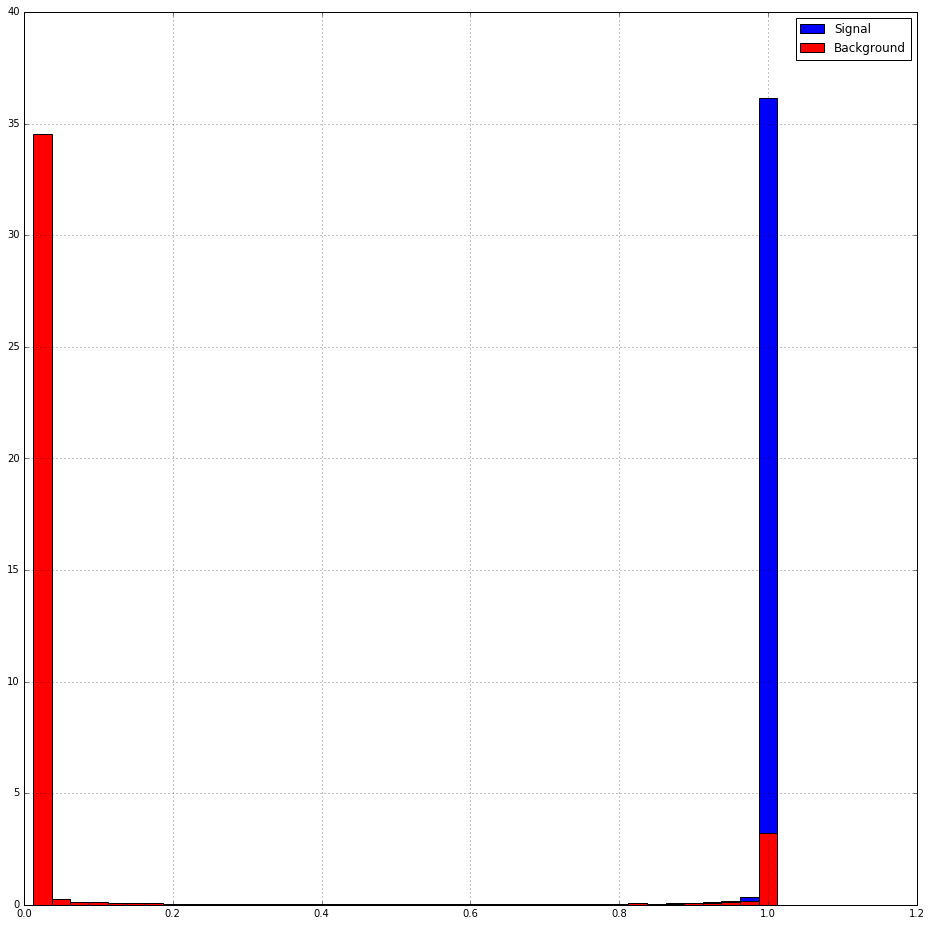

In [60]:
# Plot of the selection of signal events:
bin_width=0.025
bins = numpy.arange(0,1.01, bin_width)
sig_hist, _bin_edges = numpy.histogram(_sig_as_sig, bins=bins, density=True)
bkg_hist, _bin_edges = numpy.histogram(_bkg_as_sig, bins=bins, density=True)
bin_centers = 0.5*(_bin_edges[1:] + _bin_edges[:-1])
fig = plt.figure(figsize=(16,16))
plt.bar(bin_centers, sig_hist, bin_width, color='blue', label="Signal")
plt.bar(bin_centers, bkg_hist, bin_width, color='red', label="Background")
plt.grid(True)
plt.legend()

Clearly there is seperation power.  Now let's plot the background rejection as a function of signal efficiency:

In [95]:
cut_values_low = numpy.arange(0.0,0.99,0.025)
cut_values_hig = numpy.arange(0.99,1.0,0.0000005)
cut_values = numpy.concatenate((cut_values_low, cut_values_hig))
sig_eff = []
bkg_rej = []
_n_sig = 1.0*len(_sig_as_sig)
_n_bkg = 1.0*len(_bkg_as_bkg)
for cut in cut_values:
    sig_eff.append(numpy.sum(_sig_as_sig > cut) / _n_sig)
    bkg_rej.append(1 - numpy.sum(_bkg_as_sig > cut) / _n_bkg)


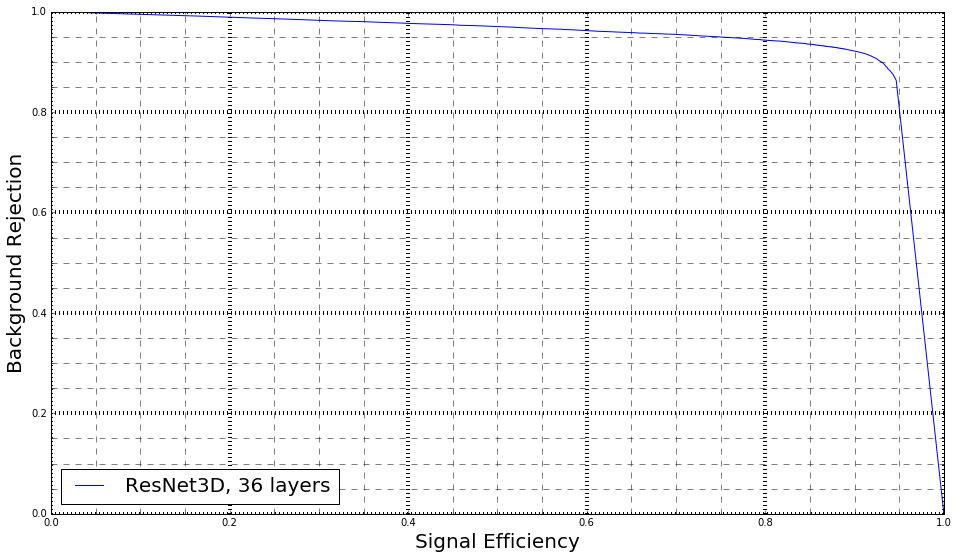

In [103]:
fig = plt.figure(figsize=(16,9))
plt.plot(sig_eff, bkg_rej, label="ResNet3D, 36 layers")
plt.xlabel("Signal Efficiency", fontsize=20)
plt.ylabel("Background Rejection",fontsize=20)
plt.minorticks_on()
plt.grid(True, which='major', lw=4)
plt.grid(True, which='minor', linestyle='--')
plt.legend(fontsize=20, loc=3)